In [33]:
import os
import sys

libs_dir = os.path.join("/".join(os.getcwd().split("/")[:-2]))
sys.path.append(libs_dir)

import numpy as np
import matplotlib.pyplot as plt
from libs.figure_config import *
import matplotlib.patches as patches
from libs.satellite import *

In [34]:
satellite_1293 = LEOsatellite(
    libs_dir + '/data/STARLINK_1293.txt')
location_aizu = np.loadtxt(
    libs_dir + '/data/ogs_loc.txt')
location_sendai = np.loadtxt(
    libs_dir + '/data/ogs_loc_sendai.txt')
year = 2021
day = 357
hour = 16
minute = 29

t = np.arange(0, 241, 10) 
second = 56 + t 
utc = 9

latitude_bob = location_aizu[:, 0]
longitude_bob = location_aizu[:, 1]
elevation_bob = location_aizu[:, 2]

latitude_alice = location_sendai[:, 0]
longitude_alice = location_sendai[:, 1]
elevation_alice = location_sendai[:, 2]

# Bob用のリスト
# Location: Sendai
slant_path_bob_lst = np.zeros(len(second))
zenith_angle_bob_lst = np.zeros(len(second))

# Alice用のリスト
# Location: Aizuwakamatsu
slant_path_alice_lst = np.zeros(len(second))
zenith_angle_alice_lst = np.zeros(len(second))

for idx in range(len(second)):
    # slant_path_lst[idx], zenith_angle_lst[idx] = satellite_1293.computeGeometricWithUser(
    #     year, day, hour, minute, second[idx], utc,
    #     longitude[idx], latitude[idx], elevation[idx]
    slant_path_bob_lst[idx], zenith_angle_bob_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_bob[0], latitude_bob[0], elevation_bob[0] # bobが単一の場合、[0]でアクセス
    )

    slant_path_alice_lst[idx], zenith_angle_alice_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_alice[0], latitude_alice[0], elevation_alice[0]
    )

slant_path_bob_lst = slant_path_bob_lst * 1000
slant_path_alice_lst = slant_path_alice_lst * 1000

In [35]:
qber_simul = np.load('results/qber_simul_bbm92_test1.npy')
skr_simul = np.load('results/skr_simul.npy')

qber_analysis = np.load('results/qber_analysis_bbm92_test1.npy')
skr_analysis = np.load('results/skr_analysis.npy')

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

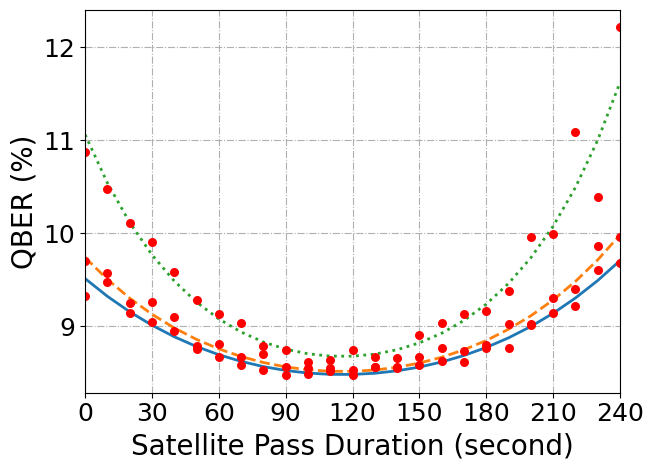

In [36]:
plt.plot(t, qber_analysis[0][:]*100)
plt.plot(t, qber_analysis[1][:]*100, ls='--')
plt.plot(t, qber_analysis[2][:]*100, ls=':')


plt.scatter(t, qber_simul[0][:]*100, marker='o', c='red', s=30, linewidths=1, zorder=2)
plt.scatter(t, qber_simul[1][:]*100, marker='o', c='red', s=30, linewidths=1, zorder=2)
plt.scatter(t, qber_simul[2][:]*100, marker='o', c='red', s=30, linewidths=1, zorder=2)


plt.xlabel(r'Satellite Pass Duration (second)')
plt.ylabel(r"QBER (%)")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
_ = plt.xticks(np.arange(0, 241, 30))

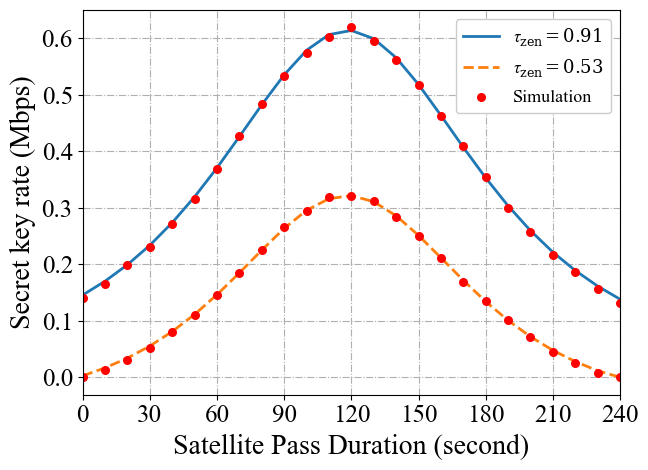

In [25]:
plt.plot(t, skr_analysis[0][:]/10**6, label=r'$\tau_{\rm zen} = 0.91$')
plt.plot(t, skr_analysis[1][:]/10**6, ls='--', label=r'$\tau_{\rm zen} = 0.53$')

plt.scatter(t, skr_simul[0][:]/10**6, marker='o', c='red', s=30, linewidths=1, zorder=2, label='Simulation')
plt.scatter(t, skr_simul[1][:]/10**6, marker='o', c='red', s=30, linewidths=1, zorder=2)

plt.xlabel(r'Satellite Pass Duration (second)')
plt.ylabel(r"Secret key rate (Mbps)")

plt.xlim(0, 240)

plt.legend()

plt.grid()
plt.tight_layout()
_ = plt.xticks(np.arange(0, 241, 30))
plt.savefig(f'skr_sat_pass.pdf', format='pdf', bbox_inches="tight")